In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import FS
import metric

2025-03-10 01:26:41.069170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

ARF_16S_metadata = pd.read_csv('../data/ARF_16S_metadata.csv',index_col = 0)
ARF_16S_ctb_family = pd.read_csv('../data/ARF_16S_ctb_family.csv',index_col = 0)

In [4]:
ARF_16S_metadata.head(3)

,Sample,Sample_name,Type,Location,Depth,Study_day,Sort1,Sort2,Stage,Stage1,...,CN_ratio,copies.gdw,log.copies.gdw,fungal.bacterial.ratio,log.f.b.ratio,Chao1,Shannon,InvSimpson,Phase,Donor
SP_A0,con15_mean,A0,con15,control,core,0,A,con,Initial,Control,...,13.441867,4.455430e+09,9.648889,0.018761,-1.726748,4519.472160,6.624858,208.516238,Initial,Control
SP_A0_CONINT,conint_mean,A0_CONINT,conint,control,interface,0,A,con,Initial,Control,...,15.469767,1.846670e+09,9.266390,0.052861,-1.276864,4444.733485,6.462025,149.034180,Initial,Control
SP_A0_CORE1,gr_15_sp1,A0_CORE1,gr15,grave,core,0,A,DA,Initial,D_Initial,...,13.054900,5.649630e+09,9.752020,0.018689,-1.728420,4506.556818,6.249346,121.798808,Initial,Donor1


In [5]:
ARF_16S_ctb_family

,Xiphinematobacteraceae,Xanthobacteraceae,Chthoniobacteraceae,Rhodanobacteraceae,Corynebacteriaceae,Subgroup_6_fa,Burkholderiaceae,Mycobacteriaceae,Enterococcaceae,Nocardiaceae,...,Gracilibacteria_unclassified,Armatimonadetes_unclassified,Catenulisporaceae,27F-1492R,bac2nit3,Candidatus_Azambacteria_fa,Clostridia_unclassified,Bacilli_unclassified,Lineage_IIc_fa,Victivallaceae
SP_A0,234.172682,443.550609,378.533253,8.815913,0.000000,1032.012783,109.647914,76.588242,0.000000,6.060940,...,0.000000,0.000000,0.550995,1.101989,0.000000,1.101989,0.0,0.0,0.550995,0.0
SP_A0_CONINT,139.478198,346.212874,262.706509,50.555204,0.000000,992.145888,352.080888,64.999549,0.000000,22.117902,...,0.902772,0.000000,0.000000,0.000000,0.000000,0.451386,0.0,0.0,0.000000,0.0
SP_A0_CORE1,459.284589,785.812464,375.808777,5.028663,0.000000,836.434342,94.874116,142.814040,0.335244,11.733548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
SP_A0_CORE2,351.996220,773.551723,561.724020,2.624879,0.787464,922.119852,93.708166,98.432947,0.000000,4.724781,...,0.000000,0.000000,0.262488,0.000000,0.000000,1.574927,0.0,0.0,0.524976,0.0
SP_A0_CORE3,392.253406,671.991539,580.994584,0.911793,0.000000,855.626675,70.937506,69.843354,0.182359,2.917738,...,0.182359,0.182359,0.000000,0.000000,0.000000,0.182359,0.0,0.0,0.182359,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIN_V384_CORE2,299.807903,870.266191,740.257958,15.436334,0.000000,763.927003,116.287047,155.735456,0.000000,34.645993,...,0.000000,0.000000,0.000000,0.343030,0.686059,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_CORE3,160.550459,452.981651,203.555046,632.167431,30.103211,409.977064,564.793578,153.383028,5.733945,64.506881,...,0.000000,0.000000,0.000000,0.000000,1.433486,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_IN1,407.015004,741.642538,531.718873,22.045275,3.290340,868.649645,147.407212,205.317189,0.000000,123.716768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
WIN_V384_IN2,37.829836,265.513757,214.995653,157.663479,2.349679,172.466458,686.106346,218.755140,0.000000,345.637820,...,0.000000,0.000000,0.000000,0.000000,0.234968,0.000000,0.0,0.0,0.000000,0.0


In [6]:
featurs_family = ARF_16S_ctb_family.columns

In [7]:
featurs_family

Index(['Xiphinematobacteraceae', 'Xanthobacteraceae', 'Chthoniobacteraceae',
       'Rhodanobacteraceae', 'Corynebacteriaceae', 'Subgroup_6_fa',
       'Burkholderiaceae', 'Mycobacteriaceae', 'Enterococcaceae',
       'Nocardiaceae',
       ...
       'Gracilibacteria_unclassified', 'Armatimonadetes_unclassified',
       'Catenulisporaceae', '27F-1492R', 'bac2nit3',
       'Candidatus_Azambacteria_fa', 'Clostridia_unclassified',
       'Bacilli_unclassified', 'Lineage_IIc_fa', 'Victivallaceae'],
      dtype='object', length=442)

In [8]:
target_variable = ARF_16S_metadata['Phase']
target_variable

SP_A0              Initial
SP_A0_CONINT       Initial
SP_A0_CORE1        Initial
SP_A0_CORE2        Initial
SP_A0_CORE3        Initial
                    ...   
WIN_V384_CORE2    RECOVERY
WIN_V384_CORE3    RECOVERY
WIN_V384_IN1      RECOVERY
WIN_V384_IN2      RECOVERY
WIN_V384_IN3      RECOVERY
Name: Phase, Length: 312, dtype: object

### Select feartures using SelectMicro

dict_keys(['selected_data', 'selected_columnames', 'selected_indices', 'relative_abundance_data', 'H_score'])

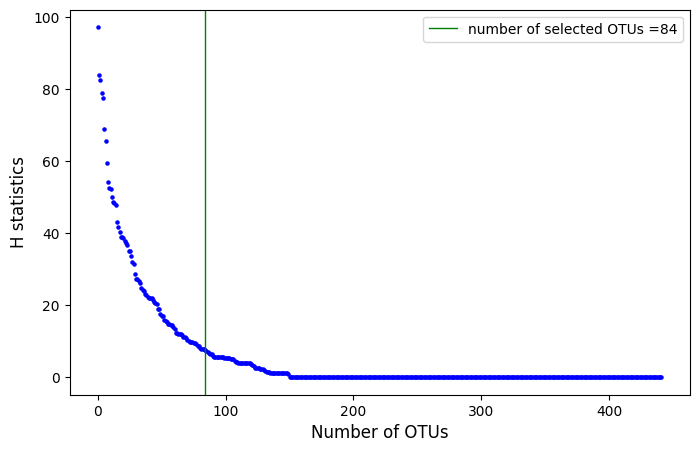

In [9]:
selectedresult=FS.SelectMicro_fun(ARF_16S_ctb_family,target_variable)
    
selectedresult.keys()

In [10]:
data = selectedresult['relative_abundance_data']


selectedOTU_index= selectedresult['selected_indices']
selectedASV = selectedresult['selected_columnames']
X_FS = selectedresult['selected_data']


In [11]:

print("The response variable and its counts are:")
print(target_variable.value_counts())

The response variable and its counts are:
Phase
RECOVERY    136
DECLINE      64
BLOOM        48
CLIMAX       48
Initial      16
Name: count, dtype: int64


In [12]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))


The shape of the original dataset is  (312, 442)
The shape of the SelectMicro dataset is  (312, 84)


In [13]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(target_variable)

In [14]:
custom_phaseorder = ['Initial', 'BLOOM', 'CLIMAX', 'DECLINE', 'RECOVERY']
custom_mapping = {category: i for i, category in enumerate(custom_phaseorder)}

In [15]:
custom_mapping

{'Initial': 0, 'BLOOM': 1, 'CLIMAX': 2, 'DECLINE': 3, 'RECOVERY': 4}

In [16]:
y = [custom_mapping[category] for category in target_variable]
y = np.array(y)
print(y)

print(target_variable)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
SP_A0              Initial
SP_A0_CONINT       Initial
SP_A0_CORE1        Initial
SP_A0_CORE2        Initial
SP_A0_CORE3        Initial
                    ...   
WIN_V384_CORE2    RECOVERY
WIN_V384_CORE3    RECOVERY
WIN_V384_IN1      RECOVERY
WIN_V384_IN2      RECOVERY
WIN_V384_IN3      RECOVERY
Name: Phase, Length: 312, dtype: object


In [17]:
X_lasso_ft,selectedOTU_index_Lasso  = RunML.LassoFS_CV(data,y)

X_FS_lasso_ft,xlabel_FS_lasso_ft0  = RunML.LassoFS_CV(X_FS,y)
selectedOTU_index_FS_lasso = selectedOTU_index[xlabel_FS_lasso_ft0]

data_subset = {"AllFeatures":data,
               "SelectMicro": X_FS,
               "Lasso_finetune":X_lasso_ft,
               "FS_Lassofinetune":X_FS_lasso_ft
              }

Best alpha: 0.1
Best alpha: 0.1


In [18]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))
print(f'The shape of the Lasso_finetune selected dataset is ',np.shape(X_lasso_ft))
print(f'The shape of the FS_Lasso_finetune selected dataset is ',np.shape(X_FS_lasso_ft))


The shape of the original dataset is  (312, 442)
The shape of the SelectMicro dataset is  (312, 84)
The shape of the Lasso_finetune selected dataset is  (312, 22)
The shape of the FS_Lasso_finetune selected dataset is  (312, 21)


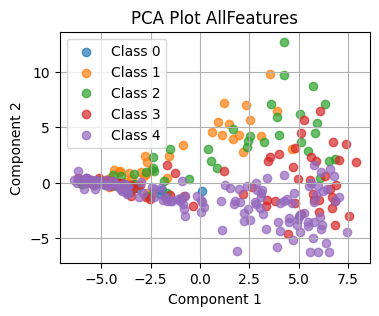

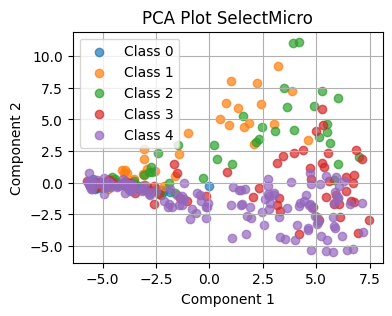

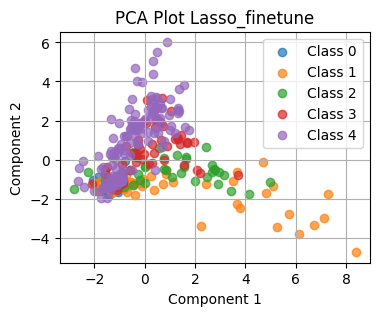

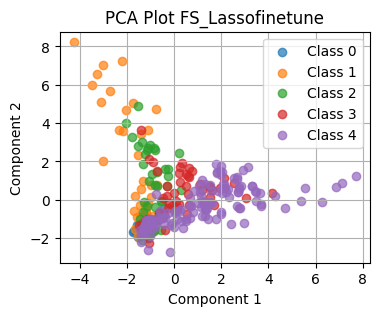

In [19]:
for datatype, subset in data_subset.items():   
    RunML.plot_dim_reduction(subset, y,method='PCA', datalabel=datatype)

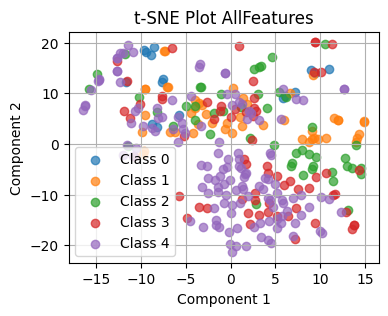

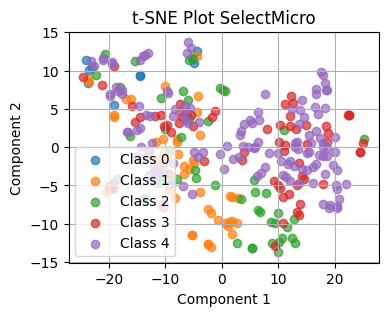

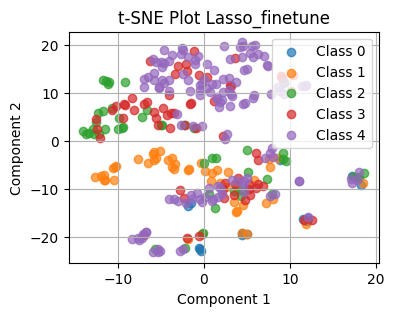

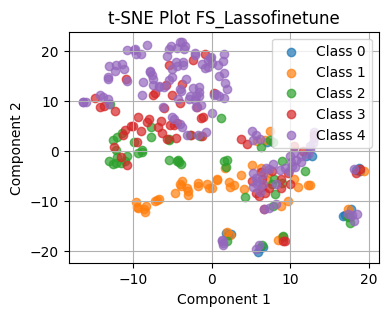

In [20]:
for datatype, subset in data_subset.items():   
    RunML.plot_dim_reduction(subset, y,method='TSNE', datalabel=datatype)

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
import shap
def RF_model_SCV_multi(X, y, plot=False,columnnames=None,SMOTE=False,k=5):
     # Initialize the classifier
   
    clf = RandomForestClassifier(n_jobs=5, random_state=777)

    # Set up 5-fold cross-validation
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=777)

    # Lists to store the results
    accuracies = []
    roc_aucs = []
    mcc_s = []
    f_scores = []
    y_true_all = []
    
    x_true_all = np.empty((0, X.shape[1]))  # Ensure correct number of columns
    shap_values_all = np.empty((0, X.shape[1]))   # Store SHAP values for each fold
    y_pred_all = []
    y_prob_all = []
    

    for train_index, test_index in kf.split(X, y):
        # Split the data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE if specified
        if SMOTE:
            X_train, y_train = RunML.perform_SMOTE(X_train, y_train)
     
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)## For multiclass, y_prob will have shape (n_samples, n_classes)

        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
        #mcc = metric.mcc_score(y_test,y_pred)
        f_score = f1_score(y_test,y_pred, average='weighted')

        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_test)
        #print(X_test.shape,shap_values.shape)
        
        accuracies.append(accuracy)
        roc_aucs.append(roc_auc)
        #mcc_s.append(mcc)
        f_scores.append(f_score)
        #shap_values_list.append(shap_values[:,:,0])
        #shap_values_list.append(np.abs(pd.DataFrame(shap_values[:,:,0]).values).mean(0))
        y_true_all.extend(y_test)# Using extend to add multiple elements
        x_true_all = np.vstack((x_true_all, X_test))
        shap_values_all = np.vstack((shap_values_all,shap_values[:, :, 0]))# save the SHAP of [0] in the result
        y_pred_all.extend(y_pred)
        y_prob_all.extend(y_prob.argmax(axis=1))  # For multiclass, take the class with the highest probability


    result = {'mean_accuracy': np.mean(accuracies),
              'std_accuracy':np.std(accuracies),
              'mean_auc': np.mean(roc_aucs),
              'std_auc':np.std(roc_aucs),
              #'mean_mcc':np.mean(mcc_s),
              'mean_f':np.mean(f_scores),
              'y_true': y_true_all,
              'y_pred':y_pred_all,
              'y_pred_prob': y_prob_all,
              'x_true':x_true_all,
              'SHAP':shap_values_all}
    if plot:
        x_true_df = pd.DataFrame(x_true_all, columns=columnnames)
        shap.summary_plot(shap_values_all, x_true_df)
    return result

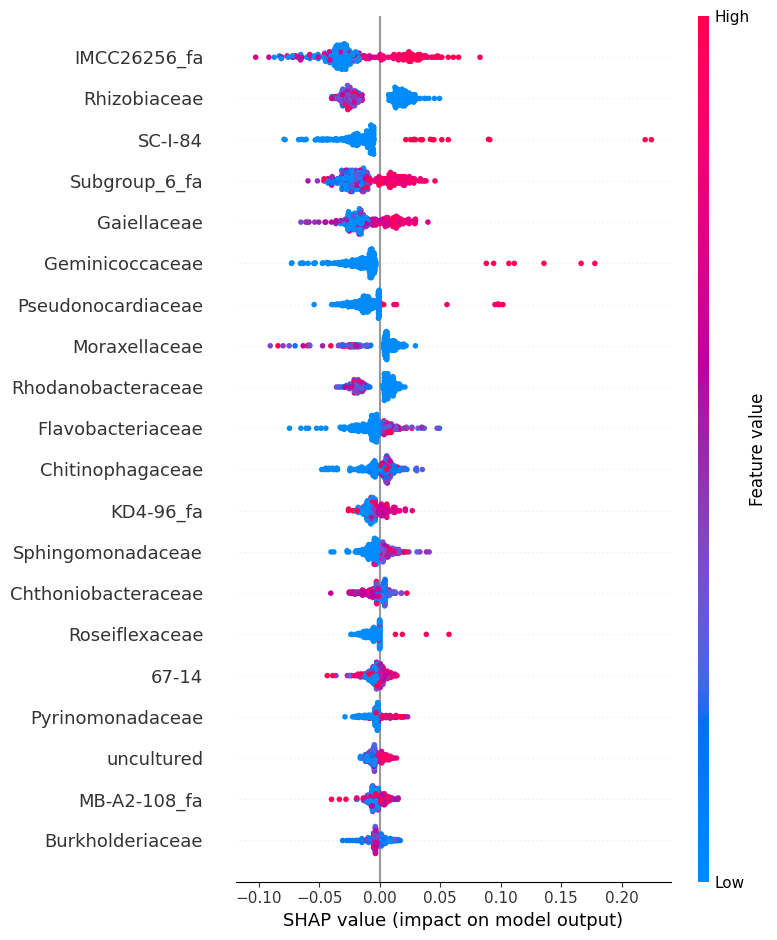

In [22]:
dict_cm = RF_model_SCV_multi(X_FS, y, plot=True,columnnames=selectedASV,SMOTE=True,k=5)

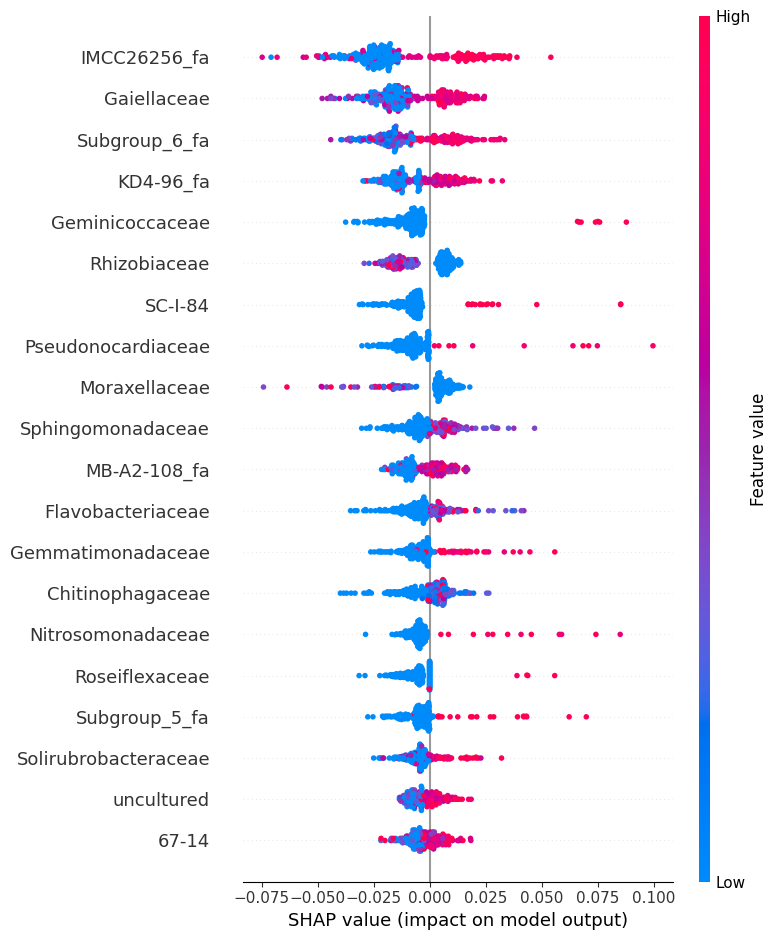

In [23]:
dict_cm_full = RF_model_SCV_multi(data, y, plot=True,columnnames=featurs_family,SMOTE=True,k=5)


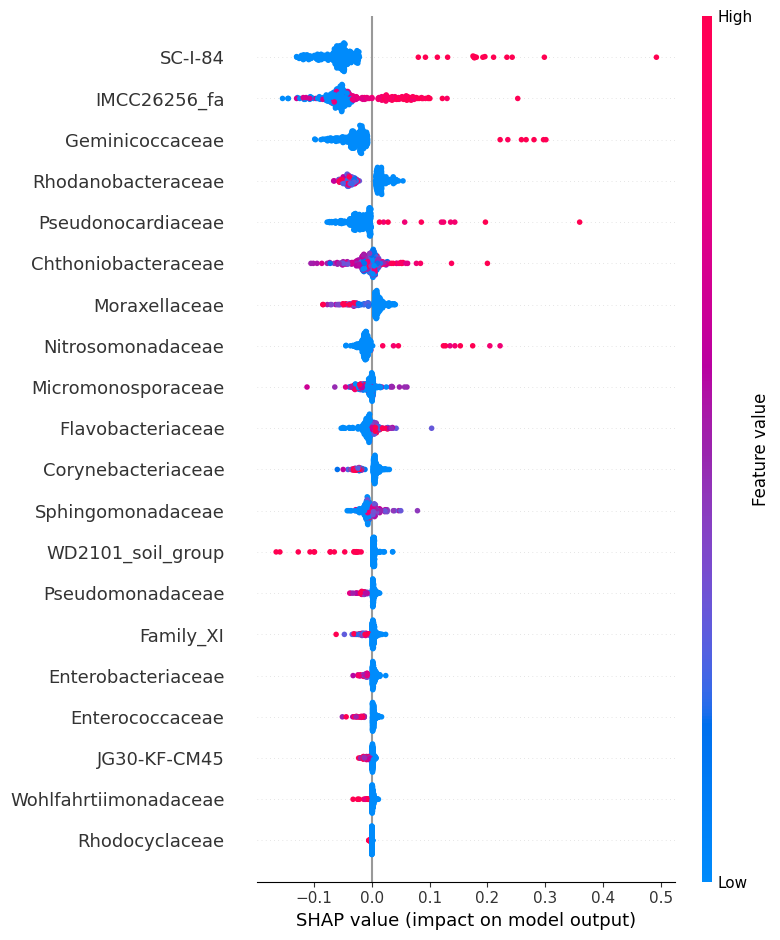

In [24]:
dict_cm_lasso = RF_model_SCV_multi(X_lasso_ft, y, plot=True,columnnames=featurs_family[selectedOTU_index_Lasso],SMOTE=True,k=5)


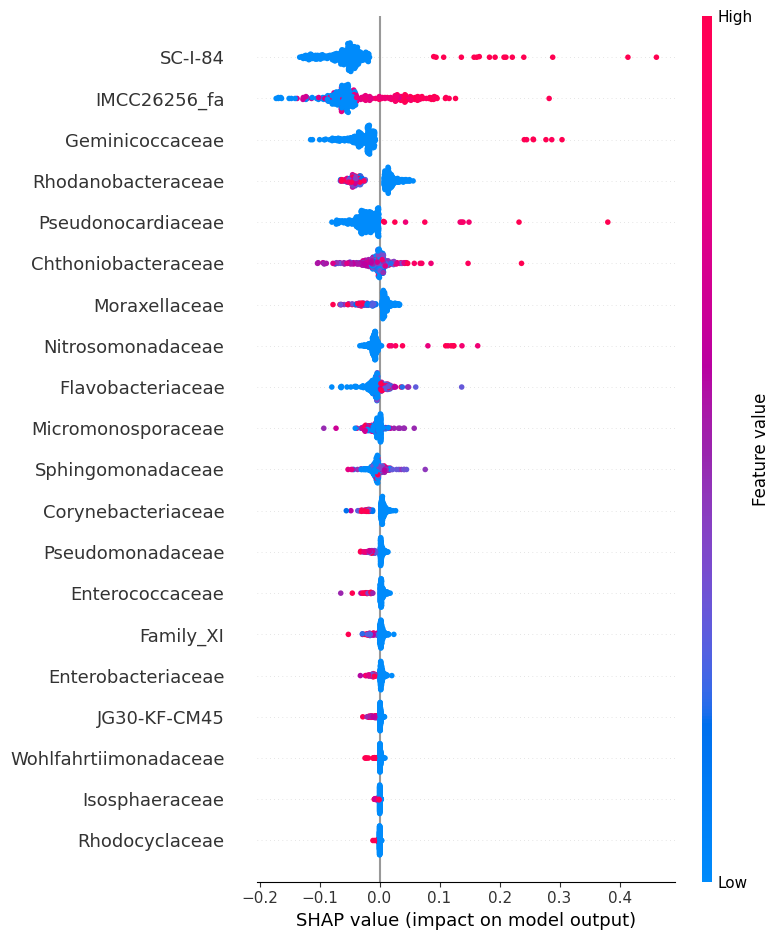

0.6090117767537122 0.836089486995847 0.6005163051488449


In [25]:
dict_cm_fs_lasso = RF_model_SCV_multi(X_FS_lasso_ft, y, plot=True,columnnames=featurs_family[selectedOTU_index_FS_lasso],SMOTE=True,k=5)
print(dict_cm_fs_lasso['mean_accuracy'],dict_cm_fs_lasso['mean_auc'],dict_cm_fs_lasso['mean_f'])

In [26]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))
print(f'The shape of the Lasso_finetune selected dataset is ',np.shape(X_lasso_ft))
print(f'The shape of the FS_Lasso_finetune selected dataset is ',np.shape(X_FS_lasso_ft))


The shape of the original dataset is  (312, 442)
The shape of the SelectMicro dataset is  (312, 84)
The shape of the Lasso_finetune selected dataset is  (312, 22)
The shape of the FS_Lasso_finetune selected dataset is  (312, 21)


In [27]:
print(dict_cm_full['mean_accuracy'],dict_cm_full['mean_auc'],dict_cm_full['mean_f'])
print(dict_cm['mean_accuracy'],dict_cm['mean_auc'],dict_cm['mean_f'])
print(dict_cm_lasso['mean_accuracy'],dict_cm_lasso['mean_auc'],dict_cm_lasso['mean_f'])
print(dict_cm_fs_lasso['mean_accuracy'],dict_cm_fs_lasso['mean_auc'],dict_cm_fs_lasso['mean_f'])

0.6315924219150025 0.8440519170717622 0.6258176893415368
0.657142857142857 0.8547990753084098 0.6478696551991744
0.6346646185355862 0.8432012165753541 0.6290315343662519
0.6090117767537122 0.836089486995847 0.6005163051488449
